# 랜드마크 분류 AI 경진대회 

## 데이터 설명

- 1049개의 클래스

1. train.zip(22GB) : 88,102장
    - train

        안에 6개 지역의 디렉토리가 있음

        ![image](https://user-images.githubusercontent.com/48716219/97189039-86b7aa80-17e7-11eb-9b8e-895dd77e39b0.png)


    - train/서울시

        각 지역의 폴더 안에 landmark를 디렉토리명으로 하는 다양한 디렉토리 존재

        ![image](https://user-images.githubusercontent.com/48716219/97189107-959e5d00-17e7-11eb-9b5b-a378f60b5237.png)


    - train/서울시/북촌 한옥마을

        landmark_name_숫자.jpg형태로 파일들이 저장

        ![image](https://user-images.githubusercontent.com/48716219/97189158-a058f200-17e7-11eb-84aa-95c6d7295266.png)


2. test.zip(9.4GB) : 37,964장

    ![image](https://user-images.githubusercontent.com/48716219/97189196-abac1d80-17e7-11eb-8749-abc7097dea47.png)

3. train.csv(2.5M) : 파일명과 랜드마크 아이디의 메타데이터

4. sample_submission.csv
    - 제출용 csv파일
    - conf컬럼은 GAP 산정 시 정렬을 위한 값으로 모델의 확률 예측값(**Softmax**)

    ![image](https://user-images.githubusercontent.com/48716219/97393773-8671f900-1926-11eb-8377-c5ba35c2d723.png)

    - id ⇒ test이미지의 파일명
    - landmark_id ⇒ 1049개의 클래스를 나타내는 id
    - conf ⇒ 예측값

5. category.json, category.csv
    - landmark_id
    - landmark_name

## 적용 해볼 모델

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
fprop = fm.FontProperties(fname=font_location)

## 데이터 및 확인

In [3]:
os.listdir('public/')

['test',
 'category.csv',
 'sample_submisstion.csv',
 'train.zip',
 'train.csv',
 '.~lock.category.csv#',
 'train',
 'category.json',
 'test.zip']

In [4]:
train_imgs = glob('public/train/*/*/*')

In [5]:
len(train_imgs)

88102

In [6]:
test_imgs = glob('public/test/*/*')
len(test_imgs)

37964

In [7]:
df_train = pd.read_csv('public/train.csv')
df_category = pd.read_csv('public/category.csv')

In [8]:
df_train.head()

,id,landmark_id
0,동탄_복합문화센터_057,114
1,동탄_복합문화센터_110,114
2,동탄_복합문화센터_016,114
3,동탄_복합문화센터_022,114
4,동탄_복합문화센터_052,114


In [9]:
df_category.head()

,landmark_id,landmark_name
0,0,금천구청
1,1,두리랜드
2,2,이대원 장군묘
3,3,성공회대학교
4,4,송상현공 동상


In [10]:
import tensorflow as tf

(540, 960, 3)


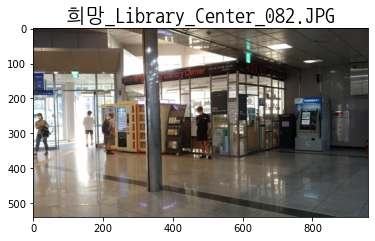

(540, 960, 3)


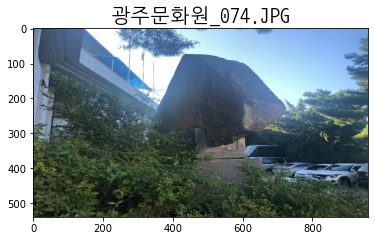

(540, 960, 3)


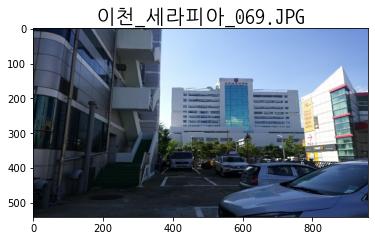

(540, 960, 3)


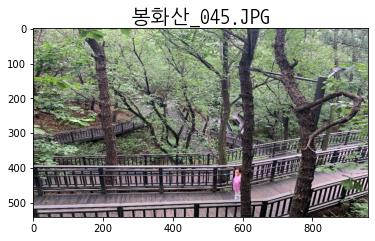

(540, 960, 3)


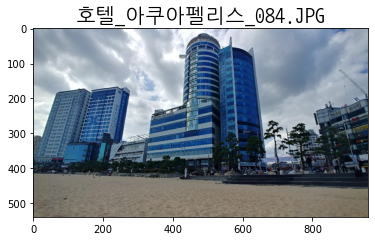

In [11]:
for _ in range(5) :
    rnum = np.random.randint(len(train_imgs))
    img = tf.io.read_file(train_imgs[rnum])
    img = tf.io.decode_jpeg(img)
    print(img.shape)
    train_imgs[rnum]
    plt.title(train_imgs[rnum].split('/')[-1], fontproperties=fprop, fontsize=20)
    plt.imshow(img)
    plt.show()

In [12]:
train_imgs[:10]

['public/train/부산시/한마음교회/한마음교회_063.JPG',
 'public/train/부산시/한마음교회/한마음교회_110.JPG',
 'public/train/부산시/한마음교회/한마음교회_066.JPG',
 'public/train/부산시/한마음교회/한마음교회_026.JPG',
 'public/train/부산시/한마음교회/한마음교회_086.JPG',
 'public/train/부산시/한마음교회/한마음교회_038.JPG',
 'public/train/부산시/한마음교회/한마음교회_082.JPG',
 'public/train/부산시/한마음교회/한마음교회_022.JPG',
 'public/train/부산시/한마음교회/한마음교회_058.JPG',
 'public/train/부산시/한마음교회/한마음교회_016.JPG']

In [13]:
df_train['path'] = 0
df_train

,id,landmark_id,path
0,동탄_복합문화센터_057,114,0
1,동탄_복합문화센터_110,114,0
2,동탄_복합문화센터_016,114,0
3,동탄_복합문화센터_022,114,0
4,동탄_복합문화센터_052,114,0
...,...,...,...
88097,양씨삼강문_060,99,0
88098,양씨삼강문_093,99,0
88099,양씨삼강문_012,99,0
88100,양씨삼강문_092,99,0


In [14]:
mapping = {}
for path in train_imgs:
    mapping[path.split('/')[-1][:-4]] = path

In [15]:
df_train['path'] = df_train['id'].map(mapping)
df_train.head()

,id,landmark_id,path
0,동탄_복합문화센터_057,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_057.JPG
1,동탄_복합문화센터_110,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_110.JPG
2,동탄_복합문화센터_016,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_016.JPG
3,동탄_복합문화센터_022,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_022.JPG
4,동탄_복합문화센터_052,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_052.JPG


In [16]:
uniques = df_train['landmark_id'].unique()

In [17]:
df_train['label'] = df_train['landmark_id'].map(dict(zip(uniques, range(len(uniques)))))

In [18]:
df_train.head()

,id,landmark_id,path,label
0,동탄_복합문화센터_057,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_057.JPG,0
1,동탄_복합문화센터_110,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_110.JPG,0
2,동탄_복합문화센터_016,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_016.JPG,0
3,동탄_복합문화센터_022,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_022.JPG,0
4,동탄_복합문화센터_052,114,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_052.JPG,0


In [19]:
df_train.shape[0]

88102

In [20]:
new_train_df = pd.DataFrame()

In [21]:
new_train_df['path'] = df_train['path']
new_train_df['label'] = df_train['label']
new_train_df

,path,label
0,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_057.JPG,0
1,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_110.JPG,0
2,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_016.JPG,0
3,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_022.JPG,0
4,public/train/경기도/동탄 복합문화센터/동탄_복합문화센터_052.JPG,0
...,...,...
88097,public/train/광주광역시/양씨삼강문/양씨삼강문_060.JPG,1048
88098,public/train/광주광역시/양씨삼강문/양씨삼강문_093.JPG,1048
88099,public/train/광주광역시/양씨삼강문/양씨삼강문_012.JPG,1048
88100,public/train/광주광역시/양씨삼강문/양씨삼강문_092.JPG,1048


In [22]:
dataset = tf.data.Dataset.from_tensor_slices((new_train_df.path.values, new_train_df.label.values))

In [23]:
def load_img(path, label) :
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img)
#     img = img / 255
    img = tf.image.resize(img, (224, 224))
#     img = tf.cast(img, tf.float32)
    
    return img, label

In [24]:
dataset = dataset.map(load_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


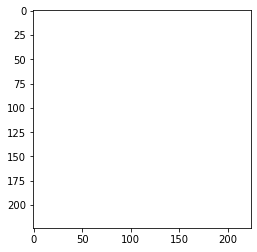

In [25]:
ii, ll = next(iter(dataset))
plt.imshow(np.float32(ii))
# plt.title(ll, fontsize=20)
plt.show()

In [26]:
df_shuffled = new_train_df.sample(frac=1).reset_index(drop=True)
df_shuffled.head()

,path,label
0,public/train/서울시/우정총국/우정총국_084.JPG,806
1,public/train/서울시/돈암시장/돈암시장_051.JPG,725
2,public/train/부산시/안락2동행정복지센터/안락2동행정복지센터_063.JPG,397
3,public/train/경기도/덕양서원/덕양서원_076.JPG,79
4,public/train/부산시/국민건강보험공단 부산남부지사/국민건강보험공단_부산남부...,422


In [27]:
t = df_shuffled[:int(len(new_train_df.path)*0.8)]
v = df_shuffled[int(len(new_train_df.path)*0.8):]

In [28]:
BATCH_SIZE = 32

In [29]:
train_ds = tf.data.Dataset.from_tensor_slices((t.path.values, t.label.values))
train_ds = train_ds.map(load_img)
train_ds = train_ds.batch(BATCH_SIZE)
# train_ds = train_ds.shuffle(df_train.shape[0])
train_ds = train_ds.repeat()
# train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [30]:
valid_ds = tf.data.Dataset.from_tensor_slices((v.path.values, v.label.values))
valid_ds = valid_ds.map(load_img)
valid_ds = valid_ds.batch(BATCH_SIZE)

In [31]:
basemodel = tf.keras.applications.EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [32]:
basemodel.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [33]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
dense_layer = tf.keras.layers.Dense(2096, activation='relu')
bn = tf.keras.layers.BatchNormalization()
prediction_layer = tf.keras.layers.Dense(1049, activation='softmax')

model = tf.keras.Sequential([
    basemodel,
    global_average_layer,
    dense_layer,
    bn,
    prediction_layer
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2096)              2684976   
_________________________________________________________________
batch_normalization (BatchNo (None, 2096)              8384      
_________________________________________________________________
dense_1 (Dense)              (None, 1049)              2199753   
Total params: 8,942,684
Trainable params: 8,896,469
Non-trainable params: 46,215
_________________________________________________________________


In [35]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# def scheduler(epochs):
#     if epochs < 10:
#         return 0.0001
#     else :
#         return 0.0001 * tf.math.exp(0.1 * (10-epochs))
# lrs = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

model.fit(train_ds,
         epochs=100,
         validation_data=valid_ds,
         steps_per_epoch=len(df_shuffled.path)//BATCH_SIZE,
          callbacks=[es]
         )

Epoch 1/100
2753/2753 [==============================] - 751s 273ms/step - loss: 1.0559 - accuracy: 0.7880 - val_loss: 0.6298 - val_accuracy: 0.8618
Epoch 2/100
2753/2753 [==============================] - 710s 258ms/step - loss: 0.3320 - accuracy: 0.9189 - val_loss: 0.7920 - val_accuracy: 0.8539
Epoch 3/100
2753/2753 [==============================] - 708s 257ms/step - loss: 0.2312 - accuracy: 0.9409 - val_loss: 0.5197 - val_accuracy: 0.8967
Epoch 4/100
2753/2753 [==============================] - 709s 258ms/step - loss: 0.1700 - accuracy: 0.9552 - val_loss: 0.5698 - val_accuracy: 0.8955
Epoch 5/100
2753/2753 [==============================] - 711s 258ms/step - loss: 0.1311 - accuracy: 0.9642 - val_loss: 0.4015 - val_accuracy: 0.9267
Epoch 6/100
2753/2753 [==============================] - 708s 257ms/step - loss: 0.1160 - accuracy: 0.9694 - val_loss: 0.4346 - val_accuracy: 0.9191
Epoch 7/100
2753/2753 [==============================] - 708s 257ms/step - loss: 0.0952 - accuracy: 0.9746

In [37]:
model.save('./landmark.h5')